In [1]:
import pandas as pd

df = pd.read_csv('ifood_df.csv')

In [2]:
df.shape
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [3]:
df = df.loc[(df['NumWebPurchases']>0) | (df['NumStorePurchases']>0) | (df['NumCatalogPurchases']>0)]
df = df.loc[(df['marital_Divorced']==1) | (df['marital_Married']==1) | (df['marital_Single']==1) | (df['marital_Together']==1) | (df['marital_Widow']==1)]
df = df.loc[(df['education_2n Cycle']==1) | (df['education_Basic']==1) | (df['education_Graduation']==1) | (df['education_Master']==1) | (df['education_PhD']==1)]
df.shape

(2201, 39)

In [4]:
df['PurchaseMethod'] = 'Store'
df.loc[(df['NumWebPurchases']>df['NumStorePurchases']) & (df['NumWebPurchases']>df['NumCatalogPurchases']),'PurchaseMethod'] = 'Web'
df.loc[(df['NumCatalogPurchases']>df['NumStorePurchases']) & (df['NumCatalogPurchases']>df['NumWebPurchases']),'PurchaseMethod'] = 'Catalog'
df['PurchaseMethod'].value_counts()

Store      1746
Web         323
Catalog     132
Name: PurchaseMethod, dtype: int64

In [5]:
df['AcceptCmp'] = 0
df.loc[df['AcceptedCmpOverall']>0,'AcceptCmp'] = 1
df['AcceptCmp'].value_counts()

0    1743
1     458
Name: AcceptCmp, dtype: int64

In [6]:
df['MaritalStatus'] = 'Single'
df.loc[df['marital_Divorced']==1,'MaritalStatus'] = 'Divorced'
df.loc[df['marital_Married']==1,'MaritalStatus'] = 'Married'
df.loc[df['marital_Together']==1,'MaritalStatus'] = 'Together'
df.loc[df['marital_Widow']==1,'MaritalStatus'] = 'Widow'
df['MaritalStatus'].value_counts()

Married     853
Together    568
Single      476
Divorced    228
Widow        76
Name: MaritalStatus, dtype: int64

In [7]:
df['EducationLvl'] = '2ndCycle'
df.loc[df['education_Basic']==1,'EducationLvl'] = 'Basic'
df.loc[df['education_Graduation']==1,'EducationLvl'] = 'Graduation'
df.loc[df['education_Master']==1,'EducationLvl'] = 'Master'
df.loc[df['education_PhD']==1,'EducationLvl'] = 'PhD'
df['EducationLvl'].value_counts()

Graduation    1110
PhD            475
Master         364
2ndCycle       198
Basic           54
Name: EducationLvl, dtype: int64

In [8]:
df['AgeGroup'] = '75-84'
df.loc[df['Age']<75,'AgeGroup'] = '65-74'
df.loc[df['Age']<65,'AgeGroup'] = '55-64'
df.loc[df['Age']<55,'AgeGroup'] = '45-54'
df.loc[df['Age']<45,'AgeGroup'] = '35-44'
df.loc[df['Age']<35,'AgeGroup'] = '25-34'
df.loc[df['Age']<25,'AgeGroup'] = '19-24'
df['AgeGroup'].value_counts()

45-54    673
35-44    498
55-64    483
65-74    337
25-34    185
75-84     23
19-24      2
Name: AgeGroup, dtype: int64

In [9]:
df['MostPurchased'] = 'Regular'
df.loc[(df['MntWines']>df['MntRegularProds']) & (df['MntWines']>df['MntFruits']) & (df['MntWines']>df['MntMeatProducts']) & (df['MntWines']>df['MntFishProducts']) & (df['MntWines']>df['MntSweetProducts']) & (df['MntWines']>df['MntGoldProds']),'MostPurchased'] = 'Wines'
df.loc[(df['MntFruits']>df['MntRegularProds']) & (df['MntFruits']>df['MntWines']) & (df['MntFruits']>df['MntMeatProducts']) & (df['MntFruits']>df['MntFishProducts']) & (df['MntFruits']>df['MntSweetProducts']) & (df['MntFruits']>df['MntGoldProds']),'MostPurchased'] = 'Fruits'
df.loc[(df['MntMeatProducts']>df['MntRegularProds']) & (df['MntMeatProducts']>df['MntWines']) & (df['MntMeatProducts']>df['MntFruits']) & (df['MntMeatProducts']>df['MntFishProducts']) & (df['MntMeatProducts']>df['MntSweetProducts']) & (df['MntMeatProducts']>df['MntGoldProds']),'MostPurchased'] = 'Meats'
df.loc[(df['MntFishProducts']>df['MntRegularProds']) & (df['MntFishProducts']>df['MntWines']) & (df['MntFishProducts']>df['MntFruits']) & (df['MntFishProducts']>df['MntMeatProducts']) & (df['MntFishProducts']>df['MntSweetProducts']) & (df['MntFishProducts']>df['MntGoldProds']),'MostPurchased'] = 'Fish'
df.loc[(df['MntSweetProducts']>df['MntRegularProds']) & (df['MntSweetProducts']>df['MntWines']) & (df['MntSweetProducts']>df['MntFruits']) & (df['MntSweetProducts']>df['MntMeatProducts']) & (df['MntSweetProducts']>df['MntFishProducts']) & (df['MntSweetProducts']>df['MntGoldProds']),'MostPurchased'] = 'Sweets'
df.loc[(df['MntGoldProds']>df['MntRegularProds']) & (df['MntGoldProds']>df['MntWines']) & (df['MntGoldProds']>df['MntFruits']) & (df['MntGoldProds']>df['MntMeatProducts']) & (df['MntGoldProds']>df['MntFishProducts']) & (df['MntGoldProds']>df['MntSweetProducts']),'MostPurchased'] = 'Golds'
df['MostPurchased'].value_counts()

Regular    1960
Wines       123
Golds       106
Fish          7
Sweets        2
Meats         2
Fruits        1
Name: MostPurchased, dtype: int64

In [10]:
df.drop(columns=['marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD'])
df.to_csv('ifood_processed.csv')

array([<Axes: title={'center': 'Catalog'}, xlabel='AgeGroup'>,
       <Axes: title={'center': 'Store'}, xlabel='AgeGroup'>,
       <Axes: title={'center': 'Web'}, xlabel='AgeGroup'>], dtype=object)

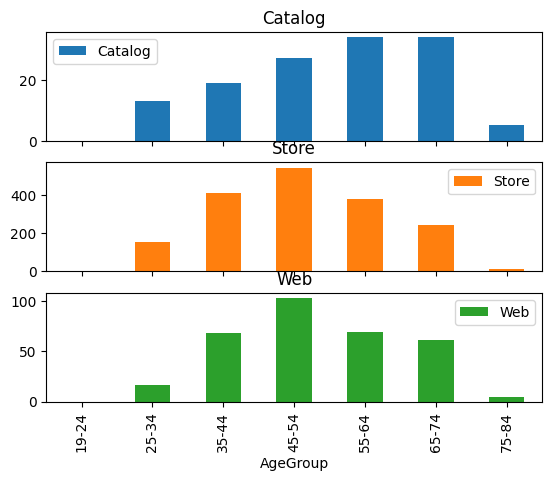

In [12]:
df.groupby('AgeGroup').PurchaseMethod.value_counts().unstack().plot.bar(subplots=True)

array([<Axes: title={'center': 'Catalog'}, xlabel='EducationLvl'>,
       <Axes: title={'center': 'Store'}, xlabel='EducationLvl'>,
       <Axes: title={'center': 'Web'}, xlabel='EducationLvl'>],
      dtype=object)

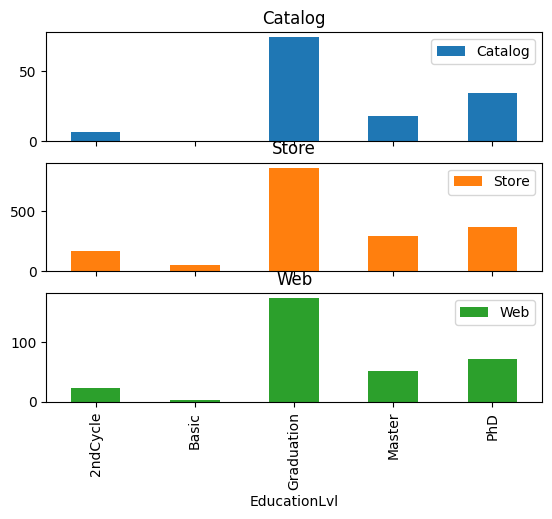

In [13]:
df.groupby('EducationLvl').PurchaseMethod.value_counts().unstack().plot.bar(subplots=True)

array([<Axes: title={'center': 'Catalog'}, xlabel='MaritalStatus'>,
       <Axes: title={'center': 'Store'}, xlabel='MaritalStatus'>,
       <Axes: title={'center': 'Web'}, xlabel='MaritalStatus'>],
      dtype=object)

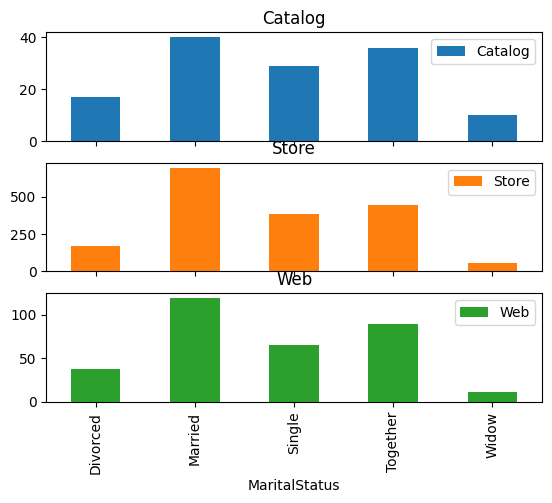

In [14]:
df.groupby('MaritalStatus').PurchaseMethod.value_counts().unstack().plot.bar(subplots=True)

array([<Axes: title={'center': 'Catalog'}, xlabel='MostPurchased'>,
       <Axes: title={'center': 'Store'}, xlabel='MostPurchased'>,
       <Axes: title={'center': 'Web'}, xlabel='MostPurchased'>],
      dtype=object)

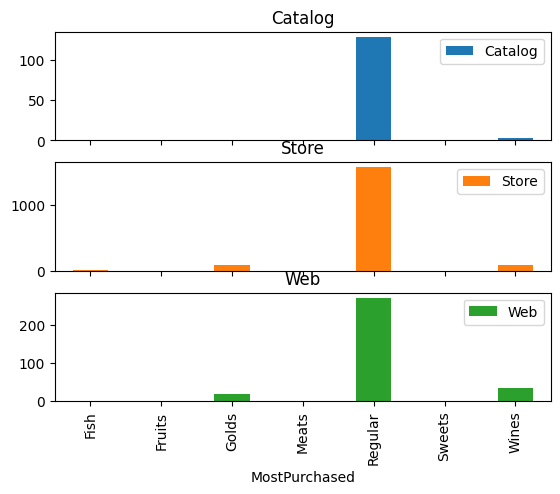

In [15]:
df.groupby('MostPurchased').PurchaseMethod.value_counts().unstack().plot.bar(subplots=True)

In [27]:
df['Income'].describe()

count      2201.000000
mean      51709.497047
std       20629.970481
min        2447.000000
25%       35322.000000
50%       51369.000000
75%       68316.000000
max      113734.000000
Name: Income, dtype: float64

array([[<Axes: title={'center': 'Income'}>]], dtype=object)

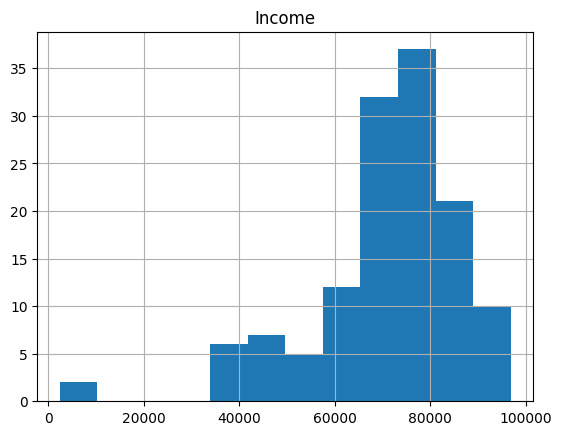

In [44]:
df.loc[df['PurchaseMethod']=='Catalog'].hist(column=['Income'],bins=12)

array([[<Axes: title={'center': 'Income'}>]], dtype=object)

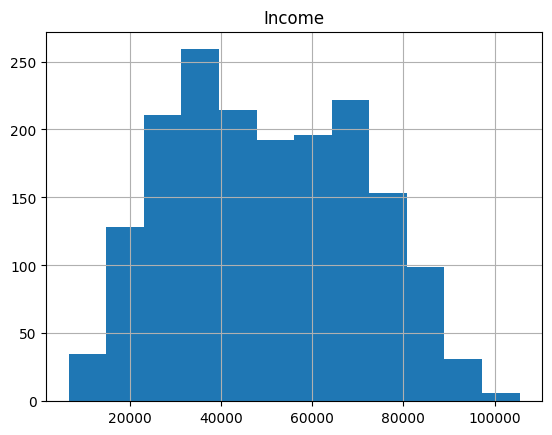

In [45]:
df.loc[df['PurchaseMethod']=='Store'].hist(column=['Income'],bins=12)

array([[<Axes: title={'center': 'Income'}>]], dtype=object)

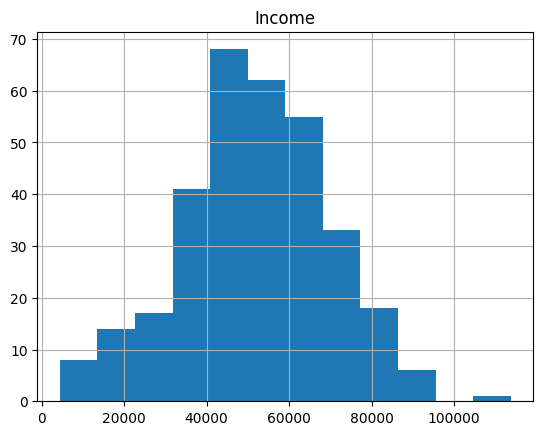

In [46]:
df.loc[df['PurchaseMethod']=='Web'].hist(column=['Income'],bins=12)

<Axes: >

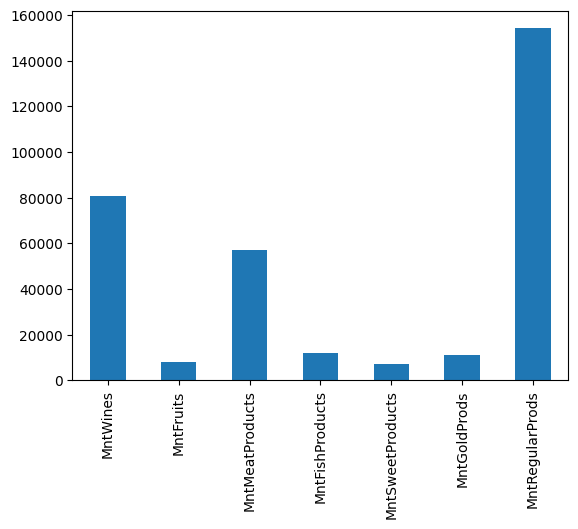

In [59]:
df.loc[df['PurchaseMethod']=='Catalog',['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','MntRegularProds']].apply(sum).plot.bar()

<Axes: >

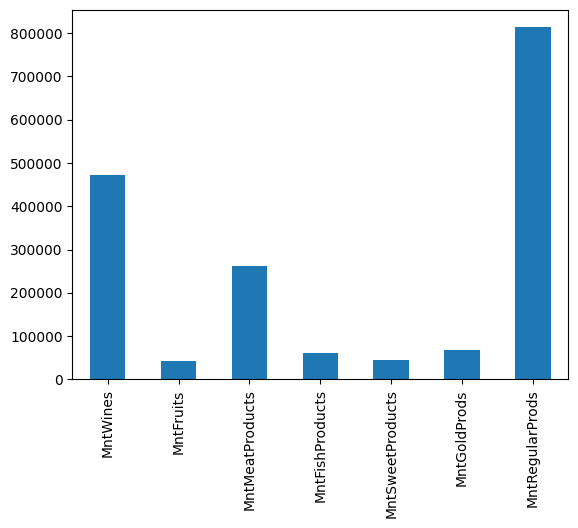

In [60]:
df.loc[df['PurchaseMethod']=='Store',['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','MntRegularProds']].apply(sum).plot.bar()

<Axes: >

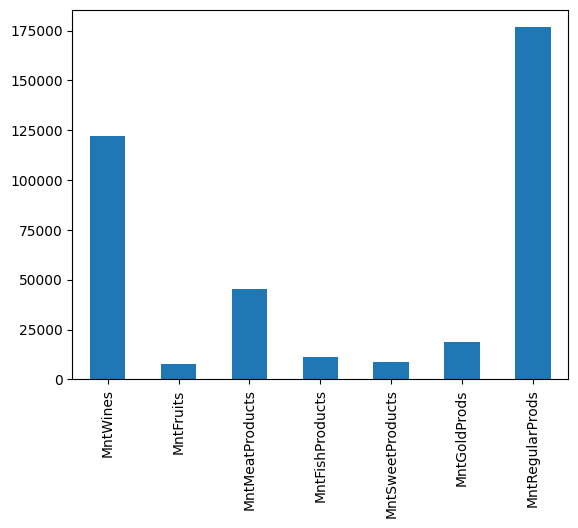

In [61]:
df.loc[df['PurchaseMethod']=='Web',['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','MntRegularProds']].apply(sum).plot.bar()

array([<Axes: ylabel='Catalog'>, <Axes: ylabel='Store'>,
       <Axes: ylabel='Web'>], dtype=object)

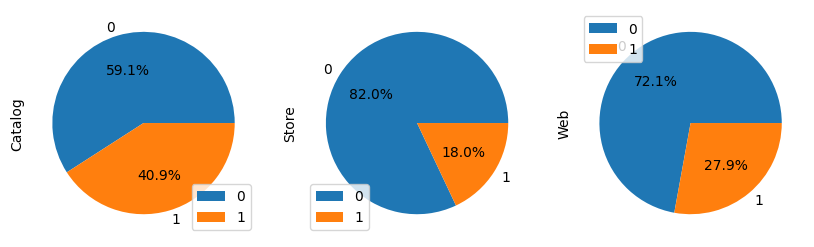

In [65]:
df.groupby('AcceptCmp').PurchaseMethod.value_counts().unstack().plot.pie(subplots=True,figsize=(10,10),autopct='%1.1f%%')

array([<Axes: title={'center': 'Catalog'}, xlabel='AcceptedCmpOverall'>,
       <Axes: title={'center': 'Store'}, xlabel='AcceptedCmpOverall'>,
       <Axes: title={'center': 'Web'}, xlabel='AcceptedCmpOverall'>],
      dtype=object)

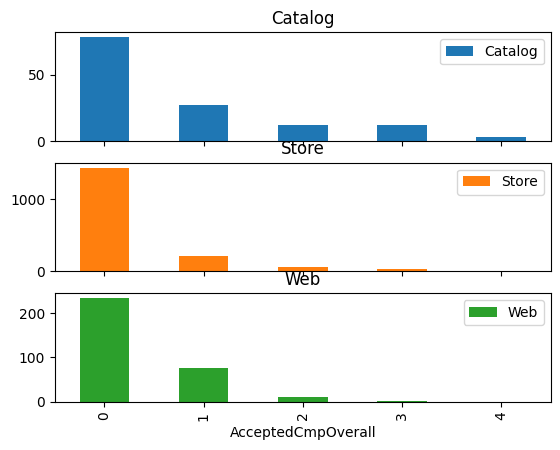

In [64]:
df.groupby('AcceptedCmpOverall').PurchaseMethod.value_counts().unstack().plot.bar(subplots=True)